# Task #2: Exploring Supervised Machine Learning
#### In this task, we predict the percentage of marks that a student is expected to score based upon the number of hours they studied using linear regression

### 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 2. Downloading the Data Set and exploring it

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
print("Shape of dataset: {}".format(data.shape))

Shape of dataset: (25, 2)


In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Number of missing values in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
# information on data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


### 3. Visualising Data

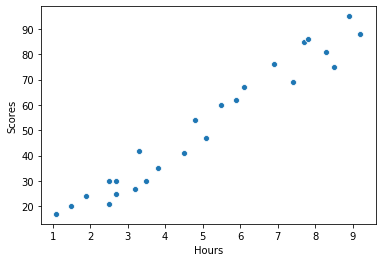

In [6]:
# data visualised using scatterplot. Linear dependents of both the variables can be clearly seen
sns.scatterplot(data['Hours'], data['Scores'])

### 4. Data Preprocessing and Modeling 

In [21]:
# converting features into x and score to y
x = np.array(data['Hours']).reshape(-1,1)
y = np.array(data['Scores']).reshape(-1,1)

In [8]:
# splitting the data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
print("x_train size: ", x_train.shape)
print("x_test size: ", x_test.shape)
print("y_train size: ", y_train.shape)
print("x_test size:", y_test.shape)

x_train size:  (17, 1)
x_test size:  (8, 1)
y_train size:  (17, 1)
x_test size: (8, 1)


#### Model I: sklearn.LinearRegression 

In [9]:
# Initialising model and fitting train dataset
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Predicting scores using test dataset
y_hat1 = lr.predict(x_test)

mean squared error:  19.158434356474494


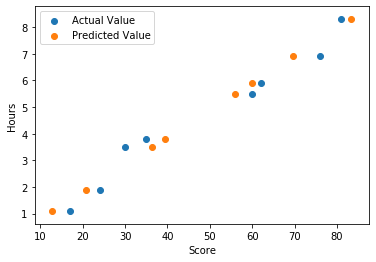

In [11]:
# checking the meansquared error of the prediction. Then visualising actual values and predicted values
print("mean squared error: ", mean_squared_error(y_test, y_hat1))
plt.scatter(y_test, x_test, label = "Actual Value")
plt.scatter(y_hat1, x_test, label = "Predicted Value")
plt.xlabel('Score')
plt.ylabel('Hours')
plt.legend()

#### Model II: Ridge Regressor
Before using the model it is fine tuned using the parameter alpha. For doing the same we use GridSearchCV from sklearn.modelselection.

In [12]:
# tuning the model
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
rr=Ridge()
grid = GridSearchCV(rr, parameters,cv=4)

In [13]:
# model with the best alpha parameter to chosen and train datasets are fitted to the model
grid.fit(x_train, y_train)
best_model = grid.best_estimator_
best_model

C:\Users\kewin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [14]:
# predicting score using test dataset
y_hat2 = best_model.predict(x_test)

mean squared error:  19.091732475168307


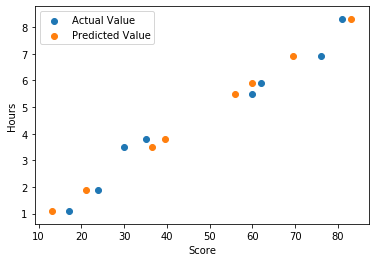

In [15]:
# checking the meansquared error of the prediction. Then visualising actual values and predicted values
print("mean squared error: ", mean_squared_error(y_test, y_hat2))
plt.scatter(y_test, x_test, label = "Actual Value")
plt.scatter(y_hat2, x_test, label = "Predicted Value")
plt.xlabel('Score')
plt.ylabel('Hours')
plt.legend()

#### Model III: Gradient Booster Regressor

In [16]:
# Initialising the model and fitting train datasets to the model.
xgbr = xgb.XGBRegressor()
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [17]:
# predicting scores using test dataset
y_hat3 = xgbr.predict(x_test)

mean squared error:  62.100643208210386


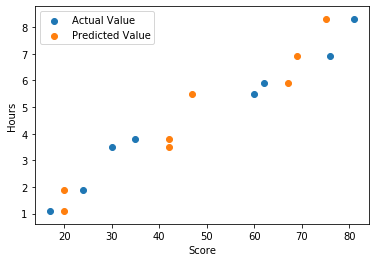

In [18]:
# checking the meansquared error of the prediction. Then visualising actual values and predicted values
print("mean squared error: ", mean_squared_error(y_test, y_hat3))
plt.scatter(y_test, x_test, label = "Actual Value")
plt.scatter(y_hat3, x_test, label = "Predicted Value")
plt.xlabel('Score')
plt.ylabel('Hours')
plt.legend()

#### Selecting the model with most accuracy

In [36]:
pd.DataFrame({"Model":['sklearn,LinearRigression', 'Ridge Regressior','Gradient Boost Regressor'],
             "Mean Squared Error":[mean_squared_error(y_test, y_hat1),
                                   mean_squared_error(y_test, y_hat2),
                                   mean_squared_error(y_test, y_hat3)]})

,Model,Mean Squared Error
0,"sklearn,LinearRigression",19.158434
1,Ridge Regressior,19.091732
2,Gradient Boost Regressor,62.100643


### 5. Predicting the output for the required feature (Expected score of a student who studes 9.25 hours a day.)
Since Ridge Regressor is the model with least value of MSE, we choose it to predict the required result 

In [23]:
result = best_model.predict(np.array(9.25).reshape(-1,1))
print("Score of a student who studies 9.25 hours a day: {}%".format(round(result[0][0], 1)))

Score of a student who studies 9.25 hours a day: 92.4%


### 6. Inference
In this task we have predicted the percentage of marks a student is expected to score based upon the amount of time they spend for studying. We have test three models for accuracy; among the three models we found that Ridge Regressior and Linear Regressor have similar accuracy with Rigde Regressor having the least value of MSE. Whereas XGB Regressor have showed greater error while predicting. XGB Models are more sophesticated and advanced than the other two, it is used main for big datasets. Therefore XGB models are model recomended for this project the available datas are very small in number. 